# Machine Exercise 3
### Prepared by: CAYAS, Ryan Roi [2022-22085]

## Prerequisites

We first import the required packages and load the necessary files.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, SVR
from time import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *

In [33]:
random.seed(0)
import warnings
warnings.filterwarnings('ignore', category=UserWarning) 

In [5]:
## We load the data
wine_qual_df = pd.read_csv('wine_quality/winequality-red.csv', sep=';')
wine_qual_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wine_qual_df.isna().sum().sum() # no missing values

0

In [7]:
wine_qual_df.quality.value_counts() # data is imbalanced

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
X = wine_qual_df.iloc[:,:-1].to_numpy()
y = wine_qual_df.iloc[:,-1].to_numpy()

## Wine Quality Classifier

In [27]:
param_grid = {
    "svc__C": [0.01, 0.1, 1, 5],
    "svc__kernel": ["linear", "poly", "rbf", "sigmoid"],
    "svc__gamma": ["scale", "auto", 0.01, 0.1, 1],
}
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

svc_pipeline = make_pipeline(StandardScaler(),
                             SVC()
                             )

grid_search = GridSearchCV(svc_pipeline, param_grid, n_jobs=-1)

start = time()
grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_["params"])))

# Print best parameters after tuning
print(grid_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

grid_predictions = grid_search.predict(X_test)



GridSearchCV took 18.54 seconds for 80 candidate parameter settings.
{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=1))])


In [34]:
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.44      0.48      0.46       204
           6       0.39      0.47      0.43       192
           7       0.13      0.05      0.07        60
           8       0.00      0.00      0.00         5

    accuracy                           0.40       480
   macro avg       0.16      0.17      0.16       480
weighted avg       0.36      0.40      0.37       480



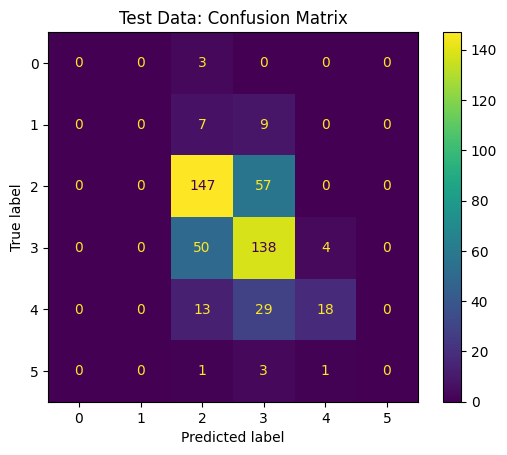

In [29]:
cfm = confusion_matrix(y_test, grid_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm)
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()

## Wine Quality Prediction as a Regression Problem

In [30]:
param_grid = {
    "svr__C": [0.01, 0.1, 1, 2],
    "svr__kernel": ["linear", "rbf", "sigmoid"],
    "svr__gamma": ["scale", "auto", 0.1, 1, 2],
    "svr__epsilon": [0.1, 0.5, 1, 2]
}
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

svr_pipeline = make_pipeline(StandardScaler(),
                             SVR()
                             )

grid_search_svr = GridSearchCV(svr_pipeline, param_grid, refit=True, n_jobs=-1)

start = time()
grid_search_svr.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search_svr.cv_results_["params"])))

# Print best parameters after tuning
print(grid_search_svr.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(grid_search_svr.best_estimator_)

grid_predictions_svr = grid_search_svr.predict(X_test)

GridSearchCV took 5.56 seconds for 240 candidate parameter settings.
{'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, gamma='auto'))])


In [31]:
def accuracy_w_tol(y_test, y_pred, tolerance):
    y_diff = np.abs(y_test - y_pred)
    within_tolerance = np.sum(y_diff <= tolerance)
    accuracy = within_tolerance / len(y_test)
    
    return accuracy

In [32]:
# Metrics for the SVR Model
mse_svr = mean_squared_error(y_test, grid_predictions_svr)
r2_svr = r2_score(y_test, grid_predictions_svr)
mad_svr = mean_absolute_error(y_test, grid_predictions_svr)
accuracy_w_tol25 = accuracy_w_tol(y_test, grid_predictions_svr, 0.25)
accuracy_w_tol50 = accuracy_w_tol(y_test, grid_predictions_svr, 0.50)
accuracy_w_tol100 = accuracy_w_tol(y_test, grid_predictions_svr, 1.00)


print(f'MSE: {mse_svr}')
print(f'R2: {r2_svr}')
print(f'MAD: {mad_svr}')
print(f'Accuracy (Tolerance = 0.25): {accuracy_w_tol25}')
print(f'Accuracy (Tolerance = 0.50): {accuracy_w_tol50}')
print(f'Accuracy (Tolerance = 1.00): {accuracy_w_tol100}')

MSE: 0.3834760519979701
R2: 0.4085162685835496
MAD: 0.4633386873192286
Accuracy (Tolerance = 0.25): 0.39375
Accuracy (Tolerance = 0.50): 0.63125
Accuracy (Tolerance = 1.00): 0.8958333333333334


We were able to improve the results of the paper but only marginally.

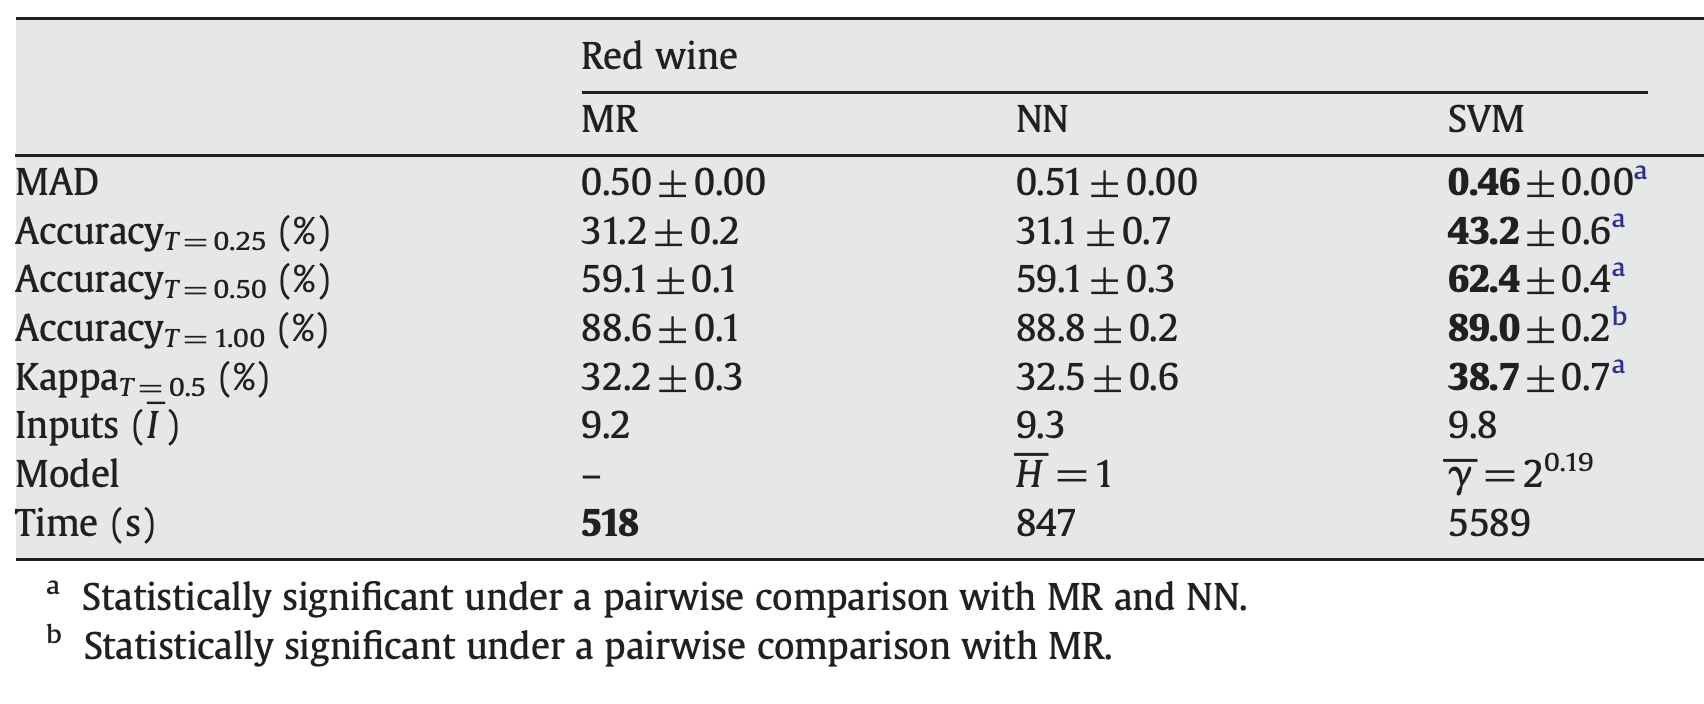

Treating the wine quality prediction as a regression problem allows us the model to be more specific with the quality of the wine. However, since the wine quality is subjectively rated, a 0.1 difference will not likely be very significant to inform the users of the model. Hence, if we use a regression model for the prediction, then the users might be confused what a "5.1" quality means. Moreover, it will also be harder for the users to compare which wine is truly better since they will have to consider the tolerance. For instance, wines with 6.1 and 6.3 qualities may be hard to compare if the tolerance of the user is >=0.2.

On the other hand, treating the wine quality prediction as a classification problem will be better for the users since the 0-10 rating scale is more easily interpretable and the users are more likely familiar with the scale. The outputs of the model will be straightforward and users will be able to immediately compare the wines based on the model results.